In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.datasets import load_digits

# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

import os

In [2]:
file_dir = os.chdir(r'C:\Users\johnh\Dropbox\Edureka\machine_learning_certification\Class5')

1. **Scikit learn comes with pre-loaded dataset, load the digits dataset from that
collection and write a helper function to plot the image using matplotlib.**
<p>[Hint: Explore datasets module from scikit learn]</p>

[YouTube](https://youtube.com)

_"This dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64."_

Dataset details can be found here: https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html 

The original dataset can be found here: 
[ICU Machine Learnig Repository](https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)


In [3]:
digits = load_digits()

In [4]:
# digits

In [5]:
digits.images.shape

(1797, 8, 8)

Now, let's work on our helper function to visualize digits

In [6]:
def my_digit(df, idx):
    """
    Function to create digit plots from the digits dataset
    """
    plt.gray()
    plt.matshow(df.images[idx], cmap=plt.cm.gray_r, interpolation="nearest")
    plt.show()
    
    

Let's use it for index 0

<Figure size 432x288 with 0 Axes>

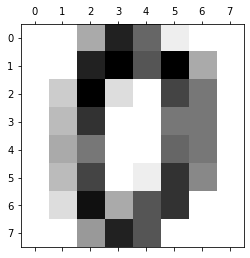

In [7]:
my_digit(digits, 0)

Let's use it for index 100

<Figure size 432x288 with 0 Axes>

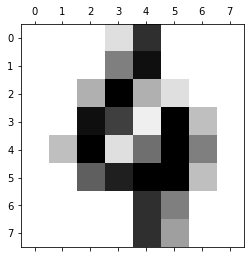

In [8]:
my_digit(digits, 100)

Let's plot multiple at a time!

In [9]:
def grid_mydigits(df, predicted = None, original = True):
    """
    Function to create digit plots from the digits dataset
    """
    if original:
        df.target
    else:
        predicted
        
    _, axes = plt.subplots(nrows= 6, ncols= 8, figsize= (14, 14))

    for ax, image, label in zip(axes.flatten(), df.images, df.target):
        ax.set_axis_off()
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title('Label:{}'.format(label))

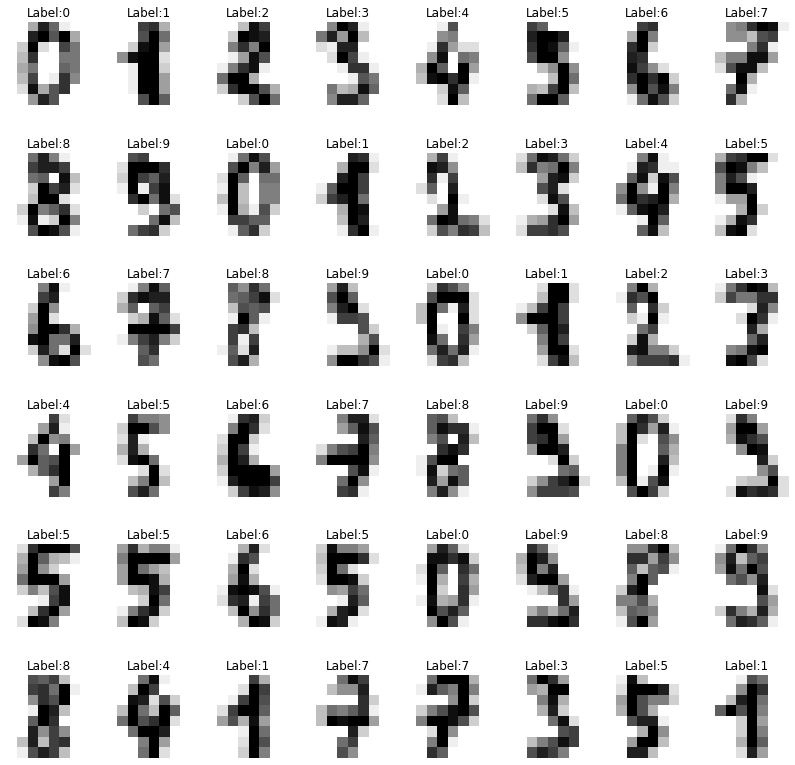

In [10]:
grid_mydigits(digits)

2. **Make a train -test split with 20% of the data set aside for testing. Fit a logistic
regression model and observe the accuracy**

In [11]:
# digitsdf

In [12]:
y = digits.target
X = digits.images #.reshape(len(digits.images), -1)
# X = digits.images

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2, random_state = 85)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 8, 8)
(360, 8, 8)
(1437,)
(360,)


In [14]:
# Reshaping is needed in order for our model to work
X_train_reshaped, X_test_reshaped = X_train.reshape(len(X_train), -1), X_test.reshape(len(X_test), -1)

In [15]:
lr = LogisticRegression(solver='lbfgs', max_iter = 2000)
lr.fit(X_train_reshaped, y_train)

LogisticRegression(max_iter=2000)

In [16]:
predictions = lr.predict(X_test_reshaped)

In [17]:
acc = accuracy_score(y_test, predictions)
print("Model accuracy is: ", "{:.2%}".format(acc))

Model accuracy is:  96.39%


This regressions works really well even though I have NOTscaled neither the train nor the test data.

3. **Using scikit learn perform a PCA transformation such that the transformed dataset can explain 95% of the variance in the original dataset. Find out the number of components in the projected subspace.**
<p>[Hint: Refer to decomposition module of scikit learn]</p>

We can achieve this by using two approaches:

*1. Through graphing the our principal components*

In [18]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_reshaped)
X_test_scaled = sc.transform(X_test_reshaped)

In [19]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [20]:
pc_values = np.arange(pca.n_components_) + 1

In [21]:
len(pc_values)

64

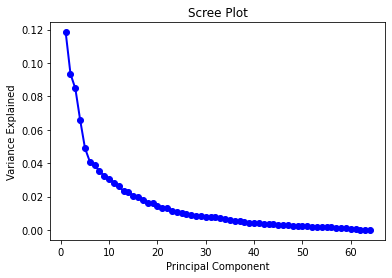

In [22]:
plt.plot(pc_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Text(0.5, 1.0, 'Explained Variance')

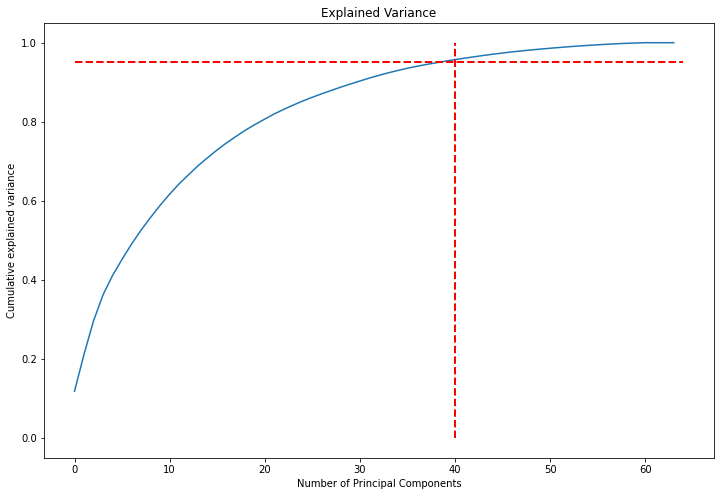

In [23]:
fig, ax = plt.subplots(figsize= (12,8))

ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.hlines(y = 0.9520017041454867, xmin= 0, xmax= len(pca.explained_variance_ratio_), linewidth=2, color='r', linestyle = '--')
ax.vlines(x = 40, ymin= 0, ymax= 1, linewidth=2, color='r', linestyle = '--')
ax.set_xlabel('Number of Principal Components')
ax.set_ylabel('Cumulative explained variance')
ax.set_title('Explained Variance')


In [24]:
pca = PCA(n_components=40)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [25]:
principalDf = pd.DataFrame(data = X_train_pca)
principalDf.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.855851,-2.726508,-3.342325,1.973001,-0.710849,-0.424605,1.420846,1.125278,-1.842633,-0.682168,...,-0.379924,-0.348994,-0.087487,-0.018562,-0.051209,-0.424953,0.164314,-0.243276,-0.152009,0.464716
1,1.310723,-1.680512,-2.585633,1.991990,0.169732,-0.205355,0.441329,1.225632,-0.788228,-1.740969,...,0.915256,-0.014821,0.142455,0.292010,0.277869,0.190394,0.355706,-0.489971,0.004730,-0.218632
2,0.613726,2.116495,-1.740794,-1.211626,0.724981,-0.569229,-0.355892,1.038004,0.620561,-1.570101,...,-0.048389,1.878724,-0.633884,-0.418373,0.449504,-1.066173,0.512342,0.963822,-0.203830,-1.197252
3,-1.153575,0.013016,-1.243455,2.498666,1.486925,-0.934643,-2.840767,1.197178,1.457428,-0.924732,...,0.583111,0.272817,-0.099650,0.297366,0.046830,0.756393,0.218916,-0.795455,-1.169025,0.244345
4,-3.340426,-1.289802,-3.069354,-1.689548,0.581184,-0.787325,0.124775,-1.090296,1.033309,1.584582,...,-1.105343,0.278521,0.212500,-1.053595,-0.277108,-0.589539,-0.607633,0.405626,-0.250549,0.172428


In [26]:
pca.explained_variance_ratio_

array([0.11837971, 0.093368  , 0.08470543, 0.06581417, 0.04894762,
       0.04091491, 0.03858852, 0.03523832, 0.03216251, 0.03049407,
       0.02826992, 0.0261072 , 0.02321763, 0.02267557, 0.0204791 ,
       0.01942636, 0.01810606, 0.01636185, 0.01590309, 0.01418077,
       0.01340218, 0.01307686, 0.01150661, 0.01093281, 0.0102896 ,
       0.00937468, 0.00894839, 0.00845634, 0.00822138, 0.00791539,
       0.00754418, 0.00743998, 0.00691026, 0.00651195, 0.00587199,
       0.00559483, 0.00504058, 0.00449397, 0.00428741, 0.00412725])

In [27]:
print('Percentage explained with {} principal components: '.format(pca.n_components_), "{:.2%}".format(sum(pca.explained_variance_ratio_)))

Percentage explained with 40 principal components:  95.33%


*2. Through inputting the explained variance ration directly*

In [28]:
pca2 = PCA(0.95)
X_train_pca2 = pca2.fit_transform(X_train_scaled)
X_test_pca2 = pca2.transform(X_test_scaled)

In [29]:
pca2.n_components_

40

In [30]:
pca2.explained_variance_ratio_

array([0.11837971, 0.093368  , 0.08470543, 0.06581417, 0.04894762,
       0.04091491, 0.03858852, 0.03523832, 0.03216251, 0.03049407,
       0.02826992, 0.0261072 , 0.02321763, 0.02267557, 0.0204791 ,
       0.01942636, 0.01810606, 0.01636185, 0.01590309, 0.01418077,
       0.01340218, 0.01307686, 0.01150661, 0.01093281, 0.0102896 ,
       0.00937469, 0.00894841, 0.00845635, 0.00822142, 0.0079154 ,
       0.00754434, 0.00744008, 0.00691039, 0.00651228, 0.00587237,
       0.00559583, 0.00504326, 0.00449506, 0.00429885, 0.00412932])

In [31]:
print('Percentage explained with {} principal components: '.format(pca2.n_components_), "{:.2%}".format(sum(pca2.explained_variance_ratio_)))

Percentage explained with 40 principal components:  95.33%


4. **Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model and comment on the accuracy.**
<p>[Hint: Project both the train and test samples to the new subspace]</p>

In [32]:
lr = LogisticRegression(solver='lbfgs', max_iter = 2000)
lr.fit(X_train_pca, y_train)

LogisticRegression(max_iter=2000)

In [33]:
predictions_new = lr.predict(X_test_pca)

In [34]:
acc_new = accuracy_score(y_test, predictions_new)

In [35]:
print("Model accuracy is: ", "{:.2%}".format(acc_new))

Model accuracy is:  96.39%


The model preserved the accuracy with only 40 components instead of the original 64.  This is a reduction in features of 37.5%

5. **Compute the confusion matrix and count the number of instances that has gone wrong. For each of the wrong sample, plot the digit along with predicted and original label.**

The outcome is multi-class confusion matrix, so I estimated micro, macro and weighted precision, recall and F1.  Then, I run a classification report.  This model has the same accuracy with 40 features, which is translated into 13 images that were wrongfully classified.  For stetic purposes, I only displayed 12 misclassified images.

In [36]:
conf_matrix = confusion_matrix(y_test, predictions_new)
conf_matrix

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 39,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 42,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 34,  0,  0],
       [ 0,  3,  0,  0,  0,  1,  0,  0, 20,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 24]], dtype=int64)

In [37]:
print('Micro Precision: {:.2%}'.format(precision_score(y_test, predictions_new, average='micro')))
print('Micro Recall: {:.2%}'.format(recall_score(y_test, predictions_new, average='micro')))
print('Micro F1-score: {:.2%}\n'.format(f1_score(y_test, predictions_new, average='micro')))

print('Macro Precision: {:.2%}'.format(precision_score(y_test, predictions_new, average='macro')))
print('Macro Recall: {:.2%}'.format(recall_score(y_test, predictions_new, average='macro')))
print('Macro F1-score: {:.2%}\n'.format(f1_score(y_test, predictions_new, average='macro')))

print('Weighted Precision: {:.2%}'.format(precision_score(y_test, predictions_new, average='weighted')))
print('Weighted Recall: {:.2%}'.format(recall_score(y_test, predictions_new, average='weighted')))
print('Weighted F1-score: {:.2%}'.format(f1_score(y_test, predictions_new, average='weighted')))

Micro Precision: 96.39%
Micro Recall: 96.39%
Micro F1-score: 96.39%

Macro Precision: 96.16%
Macro Recall: 95.78%
Macro F1-score: 95.93%

Weighted Precision: 96.40%
Weighted Recall: 96.39%
Weighted F1-score: 96.36%


In [38]:
class_rep = classification_report(y_test, predictions_new, output_dict= True)
                                
classification_report_ = pd.DataFrame(class_rep).T

classification_report_

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,35.000000
1,0.937500,0.957447,0.947368,47.000000
2,0.942857,1.000000,0.970588,33.000000
3,0.975000,0.951220,0.962963,41.000000
4,1.000000,1.000000,1.000000,42.000000
5,0.914286,0.941176,0.927536,34.000000
6,0.977273,1.000000,0.988506,43.000000
7,1.000000,0.971429,0.985507,35.000000
8,0.909091,0.833333,0.869565,24.000000
9,0.960000,0.923077,0.941176,26.000000


In [39]:
comparison_df = pd.DataFrame({'original_value': y_test, 'predicted_value': predictions_new})
comparison_df['match'] = comparison_df['original_value'] == comparison_df['predicted_value'] 
comparison_df.head()

,original_value,predicted_value,match
0,4,4,True
1,3,3,True
2,9,9,True
3,6,6,True
4,7,7,True


In [40]:
wrong_preds = comparison_df.loc[comparison_df['match'] == False]
print(wrong_preds.shape)
display(wrong_preds)

(13, 3)


,original_value,predicted_value,match
77,3,2,False
81,8,1,False
134,7,5,False
147,8,1,False
152,9,5,False
153,5,6,False
175,9,3,False
197,3,2,False
203,8,1,False
206,8,5,False


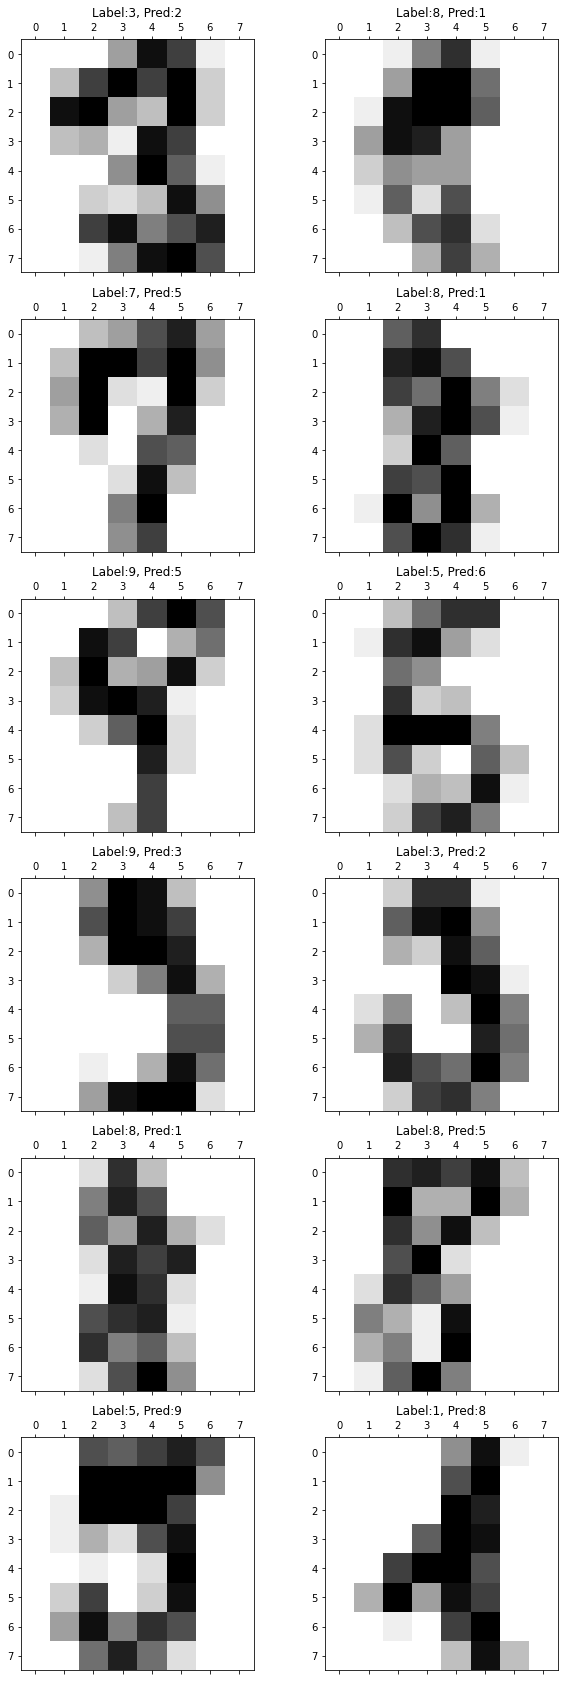

In [41]:
wrong_idxs = list(wrong_preds.index)

_, axes = plt.subplots(nrows= 6, ncols= 2, figsize= (10, 30))

for ax, num in zip(axes.flatten(), wrong_idxs):
    
    #print(num)
    original_val = wrong_preds.iloc[wrong_preds.index == num, 0].values[0]
    predicted_val = wrong_preds.iloc[wrong_preds.index == num, 1].values[0]

    ax.matshow(X_test[num], cmap=plt.cm.gray_r)
    ax.set_title('Label:{}, Pred:{}'.format(original_val, predicted_val))